# PJ01: I think that students who are more interested in the course, are more likely to recommend this course to other students in the Fall!

 ### I define a positve response as a response where a student is interested in the course/material or would recommend the course to other students.  These are responses from 5-7.  Neutral responses are 4.  Negative responses are from 1-3.  Negative responses are where a student is not interested in the material or would not recommend the class.  Signed below is my PID.

In [1]:
__author__ = "730400371"

## First, I will start the auto-reload.

In [2]:
%reload_ext autoreload
%autoreload 2

## Then I will read in the csv and convert it to a column-oriented data table.

In [3]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

## Next, I will select the 'interesting' and 'would_recommend' columns, and tabulate a table of the first five rows for demonstration.

In [4]:
from data_utils import head, select
from tabulate import tabulate
subset: dict[str, list [str]] = select(columns, ["interesting", "would_recommend"])
tabulate(head(subset, 5), subset.keys(), "html")

interesting,would_recommend
5,7
7,7
7,7
5,7
6,7


## Now, I will count the total positive. negative, and neutral responses for both the 'interesting' (in) and 'would_recommend' (wr) columns.  I will also determine the total number of responses and make sure they are equal to each other.

In [5]:
from data_utils import count
counts_in = count(subset["interesting"])
counts_wr = count(subset["would_recommend"])

total_positive_in: int = (counts_in['5']) + (counts_in['6']) + (counts_in['7'])
total_neutral_in: int = (counts_in['4'])
total_negative_in: int = (counts_in['1']) + (counts_in['2']) + (counts_in['3'])

total_positive_wr: int = (counts_wr['5']) + (counts_wr['6']) + (counts_wr['7'])
total_neutral_wr: int = (counts_wr['4'])
total_negative_wr: int = (counts_wr['1']) + (counts_wr['2']) + (counts_wr['3'])

sum_interesting: int = total_positive_in + total_neutral_in + total_negative_in
sum_would_recommend: int = total_positive_wr + total_neutral_wr + total_negative_wr


print("A positive response is defined as a value from 5-7, a negative response is defined as a value 1-3, and a neutral response is defined as a value of 4.")
print(f"Interesting had a total of {total_positive_in} positive responses, {total_neutral_in} neutral responses, and {total_negative_in} negative responses.")
print(f"Would_recommend had a total of {total_positive_wr} positive responses, {total_neutral_wr} neutral responses, and {total_negative_wr} negative responses.")
if sum_interesting == sum_would_recommend:
    print(f"There were {sum_interesting} responses for both.")
else:
    print(f"There were {sum_interesting} responses for 'interesting and {sum_would_recommend} responses for 'would_recommend'.")

A positive response is defined as a value from 5-7, a negative response is defined as a value 1-3, and a neutral response is defined as a value of 4.
Interesting had a total of 479 positive responses, 56 neutral responses, and 38 negative responses.
Would_recommend had a total of 423 positive responses, 88 neutral responses, and 62 negative responses.
There were 573 responses for both.


## Then I will calculate the number of times that individuals gave a positive response for both 'interesting' and 'would recommend'.  I will also calculate the probability of an individual responding positively for 'would_recommend', once they have already responded positively for 'intresting'.  I will implement a helper function called 'count_2var' that will count the number of times that two values appear at the same time within two lists in a dictionary.  This helper function is also useful because it converts 'str' to 'int'.  I calculate the the probability of an individual responding positively for 'would_recommend', once they have already responded positively for 'intresting', by dividing the total number of responses where individuals gave a positive response for both 'interesting' and 'would recommend', by the total number of positive responses for 'intereseting'.

In [6]:
from data_utils import count_2var, select, head

subset_1: dict[str, list [str]] = select(columns, ["interesting", "would_recommend"])
total: int = count_2var(head(subset_1, 573), "interesting", "would_recommend")
print(f"The number of times that a person who left a positive response for both 'interesting' and 'would recommend' is {total}.")
print(f"This means that if an individual left a response between 4 and 7 for the 'interesting' question, there would be a {total/total_positive_in*100}% probability that they would also respond between 4 and 7 for the 'would_recommend' question.")

The number of times that a person who left a positive response for both 'interesting' and 'would recommend' is 390.
This means that if an individual left a response between 4 and 7 for the 'interesting' question, there would be a 81.41962421711901% probability that they would also respond between 4 and 7 for the 'would_recommend' question.


## I will now plot the number of responses for 1-7, for both questions. I will synthesize two graphs, one for each.

<BarContainer object of 7 artists>

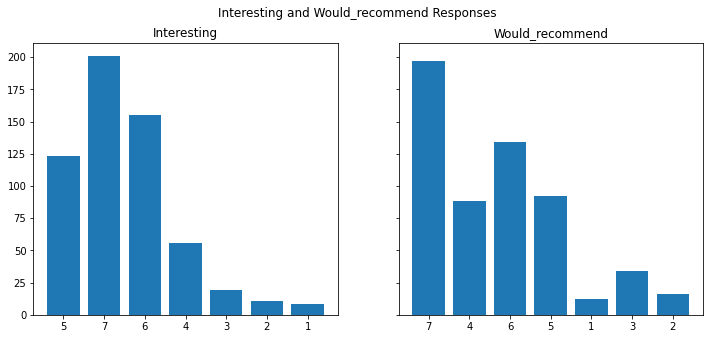

In [7]:
from matplotlib import pyplot as plt
from data_utils import count

interesting_counts: dict[str, int] = count(subset["interesting"])
would_recommend_counts: dict[str, int] = count(subset["would_recommend"])

from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Interesting and Would_recommend Responses")


axes[0].set_title("Interesting")
axes[0].bar(interesting_counts.keys(), interesting_counts.values())

axes[1].set_title("Would_recommend")
axes[1].bar(would_recommend_counts.keys(), would_recommend_counts.values())

## I will also create a table showing the totals for each the positive, negative, and neutral categories.

In [8]:
table: dict[str, list[int]] = {"Interesting: pos, neg, neu": [total_positive_in, total_negative_in, total_neutral_in], "Would_recommend: pos, neg, neu": [total_positive_wr, total_negative_wr,total_neutral_wr]}

tabulate(table, table.keys(), "html")

"Interesting: pos, neg, neu","Would_recommend: pos, neg, neu"
479,423
38,62
56,88


# Conclusion

### My findings show that those who responded positively when asked if they thought the class/material was interesting, would be 81% likely to also respond positively when asked if they would recommend the class to others. My initial prediction was correct, and I was able ot prove my hypothesis.  I learned that if an individual finds the material of the class interesting, they are likely to recommend the class to others. This shows that those who like the material of this class are most likely biased when recommending this class to their peers. This presents a couple future questions. Could this bias potentially negatively impact those who are recommended this course by a peer? Especially those who wouldn't enjoy the material of this course?